In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [154]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT"      # RBC Folate
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI"                      # RBC Folate (FOLATE
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_HealthIndicator_RawData.csv", index=False)
# print("Final dataset saved as 'SES_RAW DATA/health indicators/NHANES_SES_HealthIndicator_RawData.csv'")

In [155]:
file = "NHANES_SES_HealthIndicator_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,HOD051,IND310,BMXBMI,BMXWAIST,BPXOSY1,BPXODI1,LBXTC,LBXGLU,LBXIN,LBXHSCRP,LBXGH,LBXFER,LBDRFOSI
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,98.0,264.0,113.0,15.53,1.78,5.6,38.0,698.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,84.0,214.0,99.0,19.91,2.03,5.6,38.0,933.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,79.0,187.0,156.0,16.33,5.62,6.2,13.3,830.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,72.0,178.0,100.0,9.63,1.45,5.5,38.0,1050.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,72.0,178.0,100.0,9.63,1.45,5.5,24.4,1050.0


In [156]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXIN', 'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI'],
      dtype='object')

In [157]:
df.shape

(11933, 18)

In [158]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'Housing', # Housing
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'GlyGlycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate' # RBC Folate
]

df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,TotalSavings,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,CRP,GlyGlycohemoglobin,Ferritin,RBCFolate
0,130378.0,43.0,1.0,5.0,5.00,10.0,1.0,27.0,98.3,135.0,98.0,264.0,113.0,15.53,1.78,5.6,38.0,698.0
1,130379.0,66.0,1.0,5.0,5.00,9.0,1.0,33.5,114.7,121.0,84.0,214.0,99.0,19.91,2.03,5.6,38.0,933.0
2,130380.0,44.0,2.0,3.0,1.41,6.0,1.0,29.7,93.5,111.0,79.0,187.0,156.0,16.33,5.62,6.2,13.3,830.0
3,130381.0,5.0,2.0,4.0,1.53,4.0,1.0,23.8,70.4,117.0,72.0,178.0,100.0,9.63,1.45,5.5,38.0,1050.0
4,130382.0,2.0,1.0,4.0,3.60,8.0,1.0,26.4,92.7,117.0,72.0,178.0,100.0,9.63,1.45,5.5,24.4,1050.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 11933 non-null  float64
 1   Age                  11933 non-null  float64
 2   Gender               11933 non-null  float64
 3   Education            11933 non-null  float64
 4   FamilyIncomeRatio    11933 non-null  float64
 5   TotalSavings         11933 non-null  float64
 6   Housing              11933 non-null  float64
 7   BMI                  11933 non-null  float64
 8   WaistCircumference   11933 non-null  float64
 9   SystolicBP           11933 non-null  float64
 10  DiastolicBP          11933 non-null  float64
 11  TotalCholesterol     11933 non-null  float64
 12  FastingBloodGlucose  11933 non-null  float64
 13  InsulinLevel         11933 non-null  float64
 14  CRP                  11933 non-null  float64
 15  GlyGlycohemoglobin   11933 non-null 

In [160]:
df.drop(columns=['SEQN', 'Age', 'Gender'], inplace=True)

In [161]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [162]:
df_scaled.head()

,Education,FamilyIncomeRatio,TotalSavings,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,CRP,GlyGlycohemoglobin,Ferritin,RBCFolate
0,0.500,1.000,0.091837,0.0,0.249608,0.397418,0.432749,0.596330,0.537234,0.107570,0.021700,0.010089,0.172662,0.036611,0.077094
1,0.500,1.000,0.081633,0.0,0.351648,0.508832,0.350877,0.467890,0.404255,0.079681,0.027961,0.011600,0.172662,0.036611,0.109797
2,0.250,0.282,0.051020,0.0,0.291994,0.364810,0.292398,0.422018,0.332447,0.193227,0.022843,0.033289,0.215827,0.011457,0.095463
3,0.375,0.306,0.030612,0.0,0.199372,0.207880,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.036611,0.126078
4,0.375,0.720,0.071429,0.0,0.240188,0.359375,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.022761,0.126078


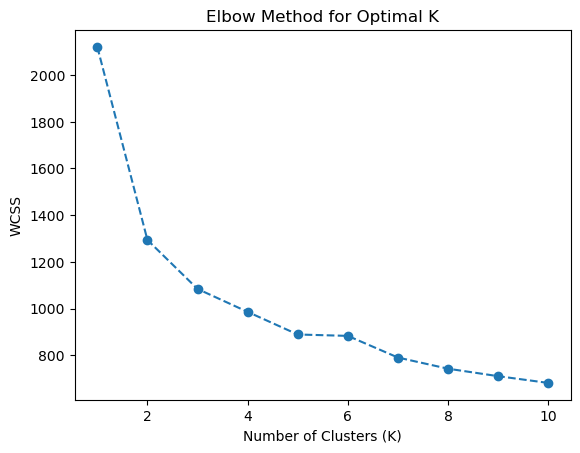

In [163]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [164]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [165]:
df_scaled.head(10)

,Education,FamilyIncomeRatio,TotalSavings,Housing,BMI,WaistCircumference,SystolicBP,DiastolicBP,TotalCholesterol,FastingBloodGlucose,InsulinLevel,CRP,GlyGlycohemoglobin,Ferritin,RBCFolate,cluster
0,0.500,1.000,0.091837,0.000000,0.249608,0.397418,0.432749,0.596330,0.537234,0.107570,0.021700,0.010089,0.172662,0.036611,0.077094,1
1,0.500,1.000,0.081633,0.000000,0.351648,0.508832,0.350877,0.467890,0.404255,0.079681,0.027961,0.011600,0.172662,0.036611,0.109797,1
2,0.250,0.282,0.051020,0.000000,0.291994,0.364810,0.292398,0.422018,0.332447,0.193227,0.022843,0.033289,0.215827,0.011457,0.095463,0
3,0.375,0.306,0.030612,0.000000,0.199372,0.207880,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.036611,0.126078,0
4,0.375,0.720,0.071429,0.000000,0.240188,0.359375,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.022761,0.126078,1
5,0.375,0.500,0.040816,0.000000,0.240188,0.359375,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.036611,0.126078,0
6,0.125,0.126,0.020408,0.000000,0.240188,0.359375,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.036611,0.126078,0
7,0.250,1.000,0.071429,0.000000,0.240188,0.359375,0.327485,0.357798,0.308511,0.081673,0.013266,0.008096,0.165468,0.036611,0.126078,1
8,0.375,0.266,0.020408,0.010204,0.299843,0.450408,0.286550,0.357798,0.321809,0.081673,0.015767,0.005679,0.136691,0.036611,0.187309,0
9,0.500,0.264,0.061224,0.000000,0.494505,0.558424,0.479532,0.394495,0.375000,0.081673,0.013266,0.023260,0.194245,0.036611,0.091149,0


In [166]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=['cluster']))

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]
# df_scaled['PCA3'] = pca_result[:, 2]

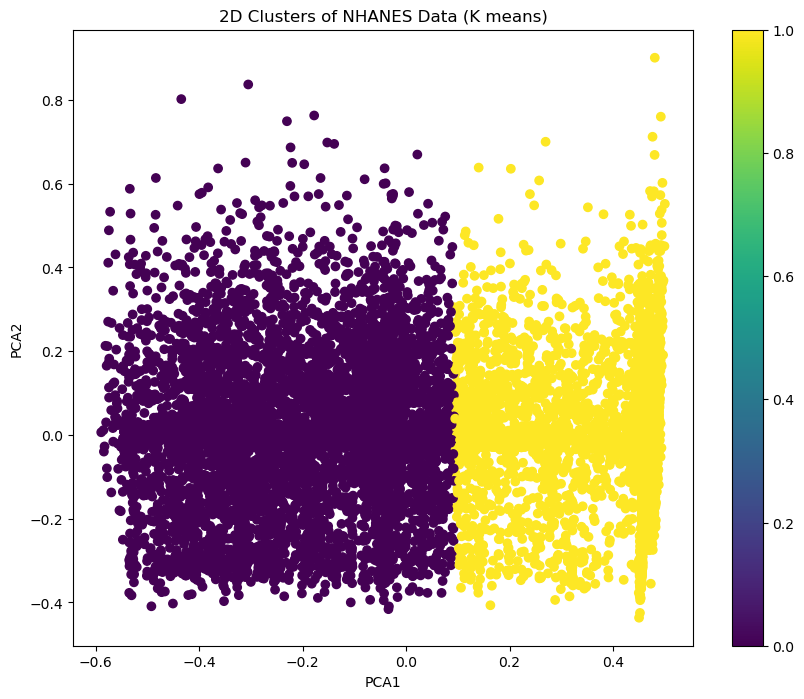

In [167]:
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['cluster'], cmap='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D Clusters of NHANES Data (K means)")
plt.colorbar()
plt.show()

In [168]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, df_scaled['cluster'])


0.6223431081553696

### DB Scan

In [169]:
dbscan_df = df.copy()
dbscan_df.head()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(dbscan_df)

X_dbscan_face, X_test = train_test_split(dbscan_df, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_dbscan_face)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=dbscan_df.columns)

X_dbscan_face['cluster'] = kmeans.labels_

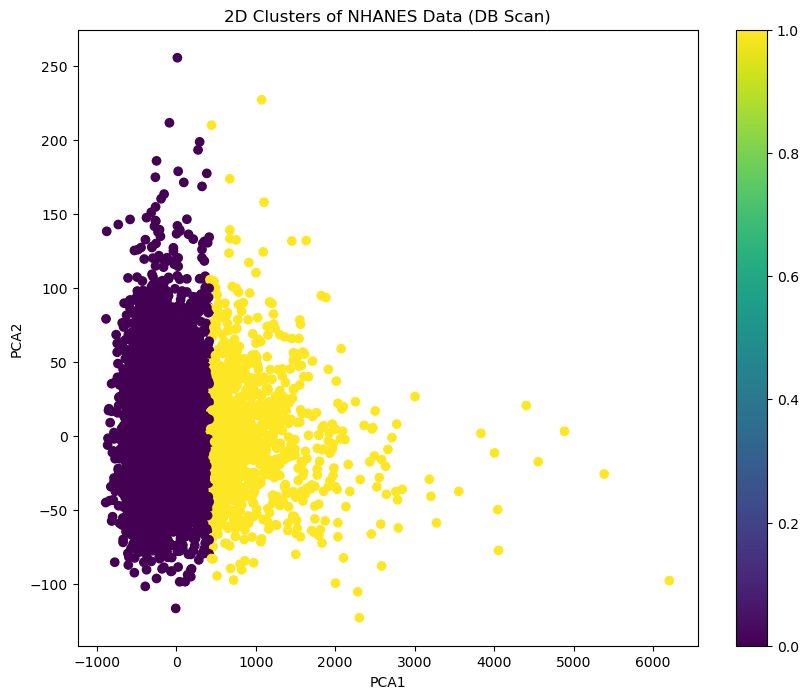

In [170]:
# use PCA in db scan

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_dbscan_face.drop(columns=['cluster']))

X_dbscan_face['PCA1'] = pca_result[:, 0]
X_dbscan_face['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(X_dbscan_face['PCA1'], X_dbscan_face['PCA2'], c=X_dbscan_face['cluster'], cmap='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D Clusters of NHANES Data (DB Scan)")
plt.colorbar()
plt.show()


In [171]:
silhouette_score(X_dbscan_face, X_dbscan_face['cluster'])

0.7376324161846273

In [172]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Total variance captured by selected components
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.98366755 0.00563238]
Total Variance Explained: 0.9892999302938241


In [173]:
# Show how much each feature contributes to each PCA component
loadings = pd.DataFrame(
    pca.components_, 
    columns=df.columns, 
    index=[f'PCA{i+1}' for i in range(pca.n_components_)]
)
print(loadings.T)  # Transpose to make it easier to read


                         PCA1      PCA2
Education            0.000058  0.000936
FamilyIncomeRatio    0.000329  0.004026
TotalSavings         0.000080  0.000750
Housing             -0.000264 -0.006340
BMI                  0.002097  0.034213
WaistCircumference   0.006914  0.111175
SystolicBP           0.004440  0.093760
DiastolicBP          0.000912  0.090713
TotalCholesterol     0.002770  0.981987
FastingBloodGlucose  0.003265  0.027693
InsulinLevel         0.000468 -0.016383
CRP                  0.001073  0.006477
GlyGlycohemoglobin   0.000153  0.001711
Ferritin             0.001190  0.063203
RBCFolate            0.999953 -0.004228
